In [34]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('./Data_for_UCI_named.csv')

In [ ]:
df

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0.023892,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,-0.031810,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0.037789,unstable


In [ ]:
df['stabf'] = df['stabf'].replace({'stable': 1, 'unstable': 0})

In [ ]:
df.columns

Index(['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2',
       'g3', 'g4', 'stab', 'stabf'],
      dtype='object')

In [ ]:
X = df[['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2', 'g3', 'g4']]
y = df['stabf']

In [ ]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
# Train a Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=1)
rf_clf.fit(X_train, y_train)


RandomForestClassifier(random_state=1)

In [ ]:
prediction = rf_clf.predict(X_test)

print(classification_report(y_test, prediction))
print('\n')
print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1288
           1       0.93      0.87      0.90       712

    accuracy                           0.93      2000
   macro avg       0.93      0.92      0.92      2000
weighted avg       0.93      0.93      0.93      2000



[[1238   50]
 [  91  621]]


In [ ]:
# Train an Extra Trees Classifier
et_clf = ExtraTreesClassifier(n_estimators=100, random_state=1)
et_clf.fit(X_train, y_train)

ExtraTreesClassifier(random_state=1)

In [ ]:
prediction = et_clf.predict(X_test)

print(classification_report(y_test, prediction))
print('\n')
print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1288
           1       0.95      0.84      0.89       712

    accuracy                           0.93      2000
   macro avg       0.93      0.91      0.92      2000
weighted avg       0.93      0.93      0.93      2000



[[1257   31]
 [ 112  600]]


In [ ]:
# Train an XGBoost model
xgb_clf = XGBClassifier(n_estimators=100, random_state=1)
xgb_clf.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

In [ ]:
prediction = xgb_clf.predict(X_test)

print(classification_report(y_test, prediction))
print('\n')
print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1288
           1       0.94      0.91      0.92       712

    accuracy                           0.95      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.95      0.95      0.95      2000



[[1243   45]
 [  64  648]]


In [ ]:
# Train a LightGBM model
lgbm_clf = LGBMClassifier(n_estimators=100, random_state=1)
lgbm_clf.fit(X_train, y_train)


LGBMClassifier(random_state=1)

In [ ]:
prediction = lgbm_clf.predict(X_test)

print(classification_report(y_test, prediction))
print('\n')
print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1288
           1       0.94      0.89      0.91       712

    accuracy                           0.94      2000
   macro avg       0.94      0.93      0.93      2000
weighted avg       0.94      0.94      0.94      2000



[[1244   44]
 [  78  634]]


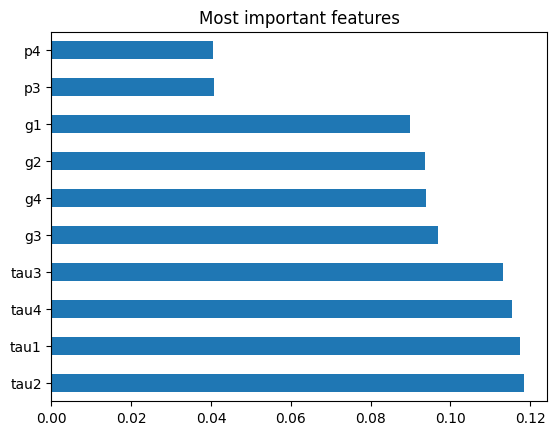

In [35]:
feat_importances = pd.Series(et_clf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Most important features')
plt.grid(visible=False)
plt.show()